# <font color='#3d59c6'> MD004 SESIÓN Test de Hipótesis </font>


- Par Inc., es un importante fabricante de equipos de golf.
- La gerencia cree que la participación de mercado de Par podría incrementarse con la introducción de una pelota de golf resistente a los cortes y de mayor duración. Por lo tanto, el grupo de investigación de Par ha estado desarrollando <font color='#C90076'> **un nuevo revestimiento de pelota de golf diseñado para resistir cortes y proporcionar una pelota más duradera** </font>
- Las pruebas con el revestimiento han sido prometedoras. Uno de los investigadores expresó su <font color='#C90076'> **preocupación por el efecto del nuevo revestimiento en las distancias de conducción**</font>. A Par le gustaría que la nueva pelota resistente a los cortes ofreciera distancias de conducción comparables a las del modelo actual de pelota de golf.
- Para comparar las distancias de conducción de las dos bolas, <font color='#C90076'> **se sometieron a pruebas de distancia 40 bolas de los modelos nuevo y actual**</font>.



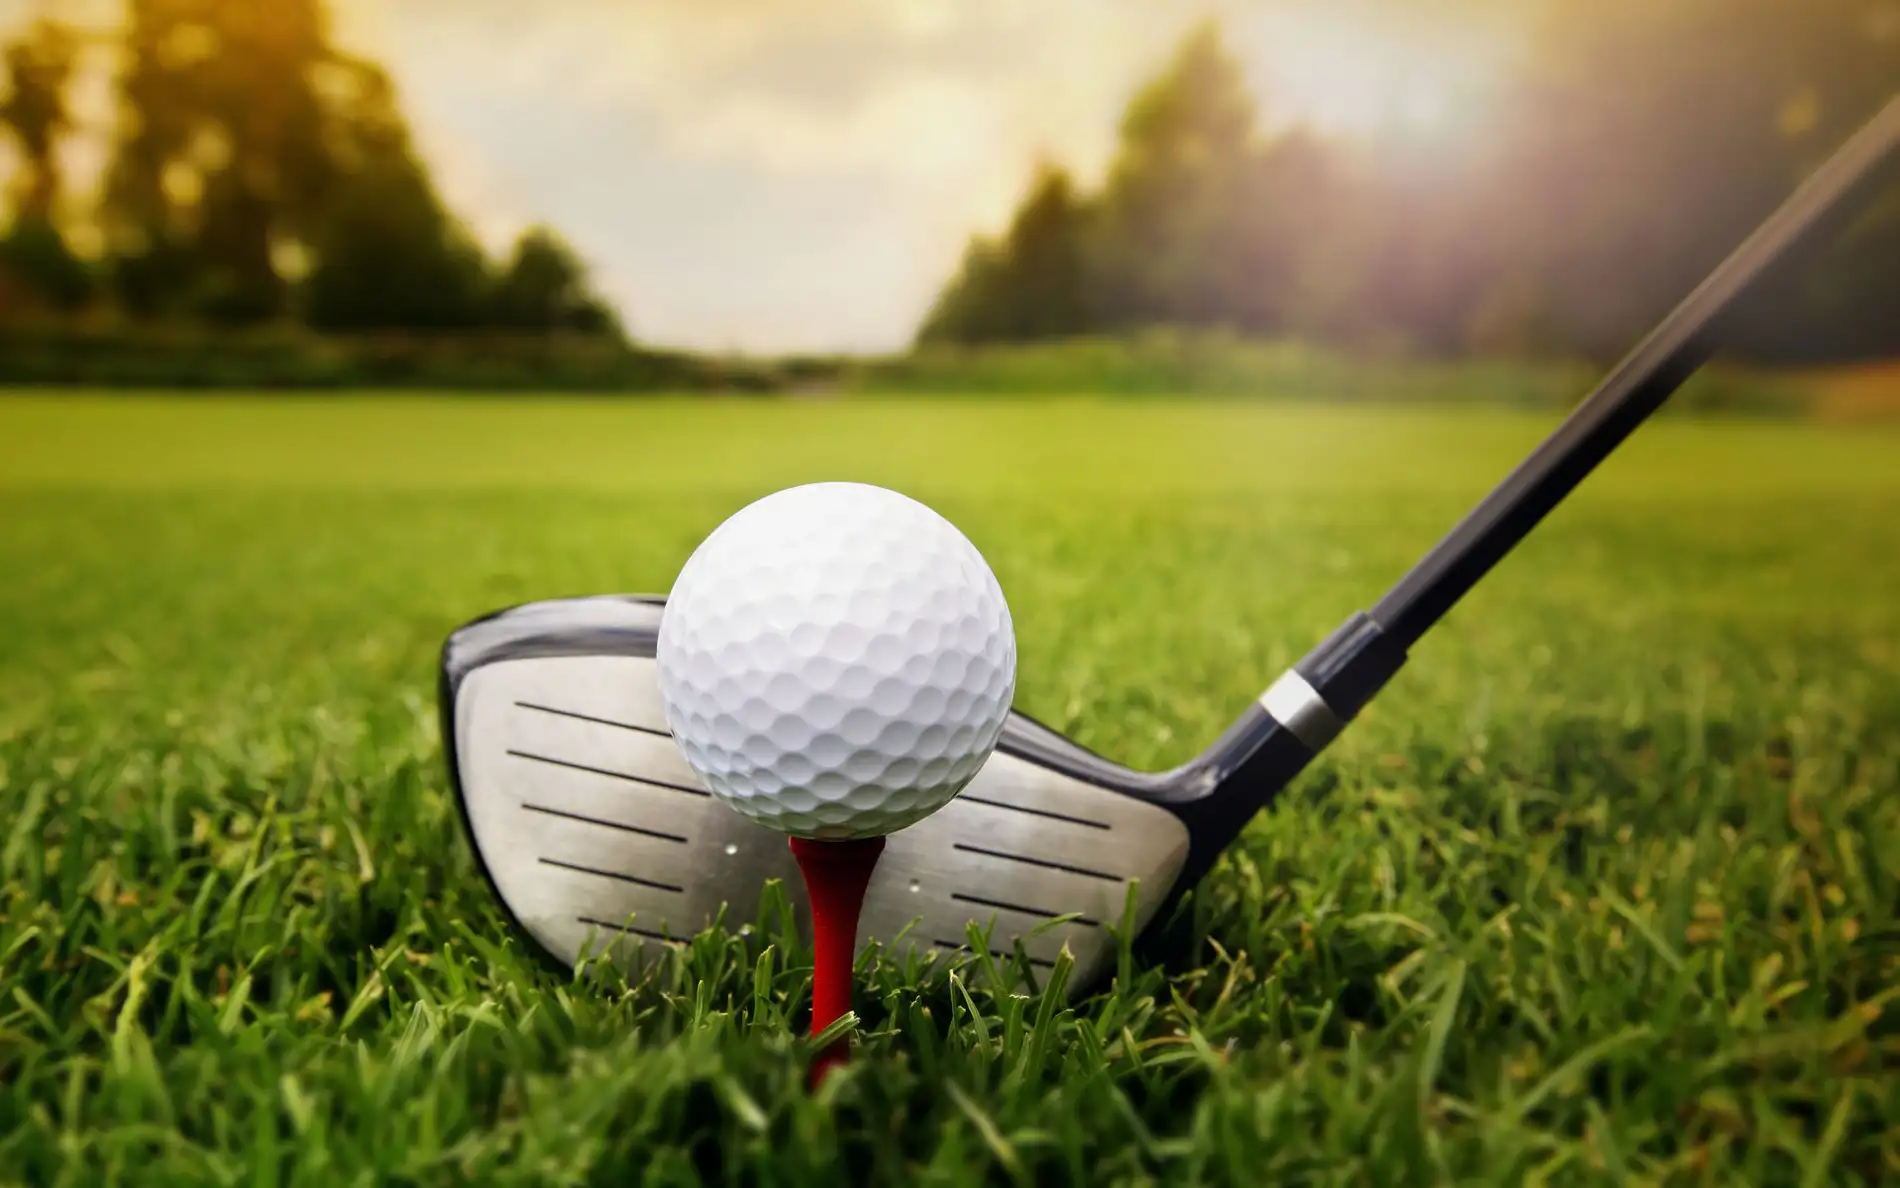


<font color='#3d59c6'>**DATA**:</font> En este ejemplo utilizaremos el dataset: **202311s20_Golf.csv**. Contiene los resultados de las pruebas, con distancias medidas a la yarda más cercana

<font color='#3d59c6'>**OBJETIVO:**</font> El objetivo del informe es explorar el conjunto de datos de Par Inc. ("Golf") en R y generar información sobre el conjunto de datos que presente la justificación de un test de hipótesis que Par podría usar para comparar las distancias de conducción de las pelotas de golf actuales y nuevas

<font color='#3d59c6'>**SUPUESTOS:**</font>

- El nivel de aceptación del cambio en la distancia de conducción de 5 yardas es aceptable para calcular los errores de Tipo I, Tipo II y el tamaño de muestra requerido.
- La máquina que se utiliza para impulsar las bolas es la misma, por lo que podemos suponer que la fuerza implícita en las bolas es igual en ambos casos.
- El flujo de aire durante la prueba es uniforme y no tiene ningún efecto sobre el cambio en las distancias de conducción.

<font color='#3d59c6'>**PASOS:**</font> 

0. Carga de Packages
1. Carga de datos
2. Realizar análisis descriptivo:
    - principales estadísiticos
    - graficación
3. Formulación y prueba de hipótesis
4. Considerarciones errores de TIPO I y TIPO II
5. Conclusión

## <font color='#3d59c6'>  CARGA DE PACKAGES </font>

In [1]:
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## <font color='#3d59c6'>  CARGA DE DATOS </font>

- **Current** >> contiene distancias de conducción de pelotas de golf sin recubrimiento
- **New** >> contiene distancias de conducción de pelotas de golf con revestimiento nuevo

In [2]:
#cargamos el fichero 202311s20_Golf.csv a nuestro entorno jupyter 
#carpeta donde vayamos a desarrollar el código
#cargamos nuestro dataset en data_golf y checkeamos los datos cargados

data_golf = read.csv(file='202311s20_Golf.csv', stringsAsFactors = F, sep = ',')
head(data_golf)#de forma predefinida retorna las primeras 6 observations
tail(data_golf)#de forma predefinida retorna las últimas 6 observations

Current New
1 264     277
2 261     269
3 267     263
4 272     266
5 258     262
6 283     251

Current New
35 275     270
36 267     263
37 279     261
38 274     255
39 276     263
40 262     279

In [3]:
#podemos usar la funcion names() y dim() para observar el nombre de las variables y ver cuantos registros y columnas tenemos
names(data_golf)
dim(data_golf)

[1] "Current" "New"

[1] 40  2

In [4]:
#observamos el tipo de datos, cuantos registros tiene el dataset y cuantas variables
str(data_golf)

'data.frame':	40 obs. of  2 variables:
 $ Current: int  264 261 267 272 258 283 258 266 259 270 ...
 $ New    : int  277 269 263 266 262 251 262 289 286 264 ...


## <font color='#3d59c6'>  REALIZAR ANÁLISIS DESCRIPTIVO </font>

In [5]:
summary(data_golf)

    Current           New       
 Min.   :255.0   Min.   :250.0  
 1st Qu.:263.0   1st Qu.:262.0  
 Median :270.0   Median :265.0  
 Mean   :270.3   Mean   :267.5  
 3rd Qu.:275.2   3rd Qu.:274.5  
 Max.   :289.0   Max.   :289.0  

In [6]:
print("Valores SD")
lapply(data_golf[, 1:2], sd)

[1] "Valores SD"


$Current
[1] 8.752985

$New
[1] 9.896904

In [7]:
print("Valores Varianza")
lapply(data_golf[, 1:2], var)

[1] "Valores Varianza"


$Current
[1] 76.61474

$New
[1] 97.94872

In [8]:
#attach() nos permite acceder directamente a las "columnas" de un data frame usando simplemente el nombre de la columna
#más info: https://reptantia.com/blogs/r/attach-y-detach-en-r)
attach(data_golf)

In [9]:
cat("SD for difference between New and Current: ", sd(New-Current))

SD for difference between New and Current:  13.74397

In [10]:
#finalmente observamos si existen valores NA o outliers
sum(is.na(data_golf))
cat("Outliers in Current: ", boxplot(Current, plot=F)$Out, " ; Outliers in New: ",boxplot(New, plot=F)$Out)

[1] 0

Outliers in Current:   ; Outliers in New: 

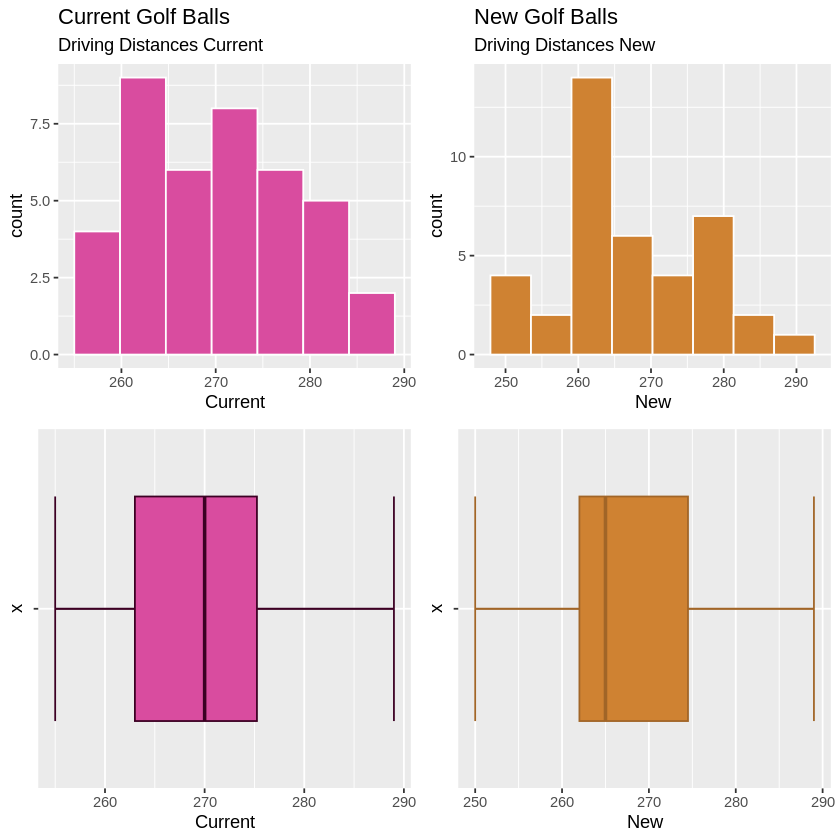

In [11]:
a= ggplot(data_golf) + #señalamos el dataframe
  aes(x = Current) + #indicamos la variable 
  geom_histogram(bins = 8 ,fill = "#d94c9f",color = "white") + #color del contorno
  labs(title="Current Golf Balls"  ,subtitle = "Driving Distances Current",x = "Current")  #nombre variable eje x
b= ggplot(data = data_golf, aes(x = "", y = Current)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#d94c9f",color = "#3c0023") +
       coord_flip() # Boxplot horizontal
a1= ggplot(data_golf) + #señalamos el dataframe
  aes(x = New) + #indicamos la variable 
  geom_histogram(bins = 8 ,fill = "#cf8232",color = "white") + #color del contorno
  labs(title="New Golf Balls"  ,subtitle = "Driving Distances New",x = "New")  #nombre variable eje x
b1= ggplot(data = data_golf, aes(x = "", y = New)) +
       stat_boxplot(geom = "errorbar" ,color = "#a16527") +
       geom_boxplot(fill = "#cf8232",color = "#a16527") +
       coord_flip() # Boxplot horizontal
grid.arrange(a,a1,b,b1)

- Ambas variables tienen una distribución con tendencia a parecer **normal**
- La variable <i>New</i> está **sesgada a la derecha (asimetría negativa)**.

- No se observan valores atípicos.

(Nota: la barra que corta el Boxplot indica donde se encuentra la mitad de los datos, es decir, si ordenamos las observaciones a partir de la variable distancia de forma ascendiente, para el caso de las distancias actuales obtenemos que la mitad de las observaciones se encuentran entorno a las 270 yardas y, para el caso de las nuevas distancias, la mitad de las observaciones se encuentran en torno a las 265 yardas. Esto quiere decir que aunque para ambas clases la distribución y la media sean muy parecidas, en el caso de las nuevas distancias se acumulan mucho volumen de datos con distancias entre las 260 y 265 yardas.)

1. Sample size: 40
2. Número de muestras: 2
3. Variables no pareadas (distintos tipos de recubrimiento).
4. DOF (Degrees Of Freedom) = 40 + 40-2 = 78
5. No hay valores atípicos en los datos dados, ni valores perdidos.
6. Ambas muestras **parecen** estar distribuidas normalmente, aunque los datos de las distancias de conducción de las bolas nuevas parecen estar **sesgados a la derecha**.
7. Los valores medios y medianos no son muy diferentes.

## <font color='#3d59c6'>  FORMULACIÓN Y PRUEBA DE HIPÓTESIS </font>

1. El nivel de significancia (Alfa) = 0.05
2. El tamaño de la muestra N = 40 que es suficientemente grande para una prueba Z stat.
3. Pero como se desconoce la desviación estándar de la población (Sigma), tenemos que usar una T Test stat.
4. Dado que la muestra es diferente para ambas pruebas de muestreo (datos no pareados), tenemos N + N-2 grados de libertad = 78
5. Dado que el único propósito de la prueba es verificar si hay algún efecto en las distancias de conducción debido al nuevo recubrimiento, podríamos preferir una prueba T de dos colas.

Utilizamos una T Test de muestra independiente de dos colas para las medias:

  1. Hipótesis nula:
     + $H_{0}: µ_{Current} - µ_{New} = 0$ (el nuevo recubrimiento no tiene efecto en las distancias de conducción)
 
 
  2. Hipótesis alternativa: 
    + $H_{1}: µ_{Current} - µ_{New} {\ne} 0$ (el nuevo revestimiento tiene un efecto significativo en las distancias de conducción)


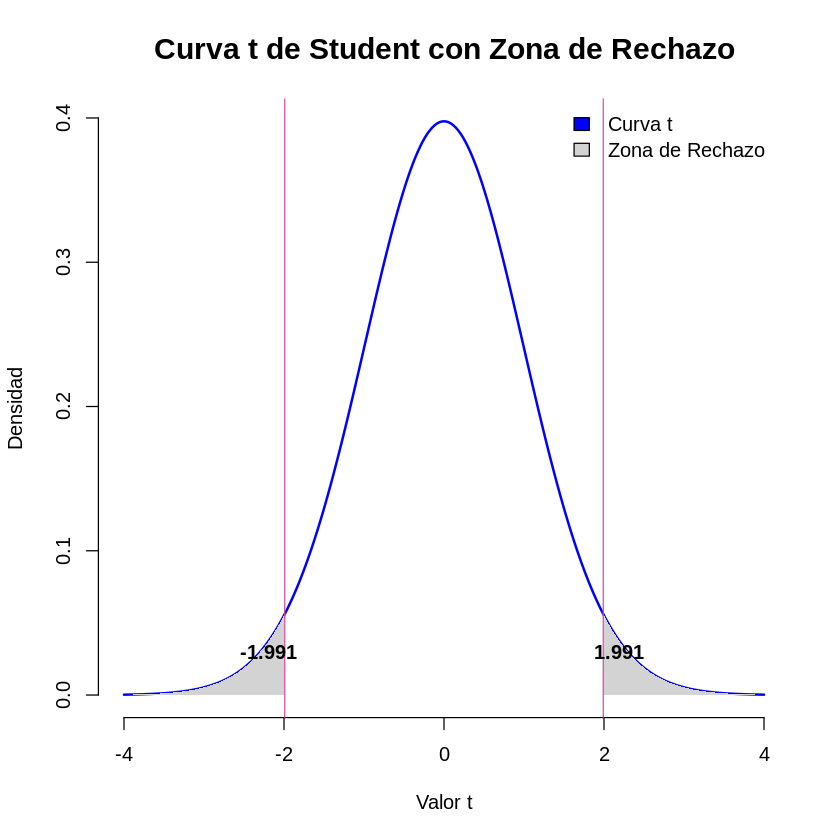

In [12]:
n_grados = 78
nivel_significancia = 0.05
# Valores críticos
valor_critico_superior = qt(1 - nivel_significancia / 2, df = n_grados)
valor_critico_inferior = -valor_critico_superior
# Generamos y dibujamos una curva t
x = seq(-4, 4, length.out = 1000)
y = dt(x, df = n_grados)
plot(x, y, type = "l", lwd = 2, col = "blue", xlab = "Valor t", ylab = "Densidad", bty = "n")
# Pintamos el área bajo la curva 
x_area_inferior = x[(x >= min(x)) & (x < valor_critico_inferior)]
y_area_inferior = dt(x_area_inferior, df = n_grados)
x_area_superior = x[(x > valor_critico_superior) & (x <= max(x))]
y_area_superior = dt(x_area_superior, df = n_grados)
polygon(c(x_area_inferior,valor_critico_inferior,min(x)),c(y_area_inferior, 0, 0),col = "lightgray", border = NA)
polygon(c(valor_critico_superior,x_area_superior,max(x_area_superior)),c(0, y_area_superior, 0),col = "lightgray", border = NA)
# Valores críticos
abline(v = c(valor_critico_inferior, valor_critico_superior), col = "#d94c9f", lty = 1)
# Añadimos valores críticos
text(valor_critico_inferior - 0.2, 0.03, round(valor_critico_inferior, 3), col = "black", font = 2)
text(valor_critico_superior + 0.2, 0.03, round(valor_critico_superior, 3), col = "black", font = 2)
# Título y leyenda
title("Curva t de Student con Zona de Rechazo", cex.main = 1.5)
legend("topright", legend = c("Curva t", "Zona de Rechazo"), fill = c("blue", "lightgray"), cex = 1, bty = "n")

In [13]:
print("T TEST DE MEDIAS INDEPENDIENTES CON DOS MUESTRAS DE DOS COLAS")
tt=t.test(Current, New, 
       paired = F, 
       conf.level = 0.95, 
       alternative = "t")
print(tt)

[1] "T TEST DE MEDIAS INDEPENDIENTES CON DOS MUESTRAS DE DOS COLAS"

	Welch Two Sample t-test

data:  Current and New
t = 1.3284, df = 76.852, p-value = 0.188
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.384937  6.934937
sample estimates:
mean of x mean of y 
  270.275   267.500 



 + En este escenario, el p valor es 0.188 que es mayor que 0.05.
 + Por lo tanto, no podemos rechazar la Hipótesis nula.
 + Por lo tanto, se acepta la hipótesis nula de que no hay un cambio significativo en las distancias de conducción debido al nuevo recubrimiento.
 + Intervalo de confianza del 95% para la diferencia en la media es [-1.384937  TO  6.934937]

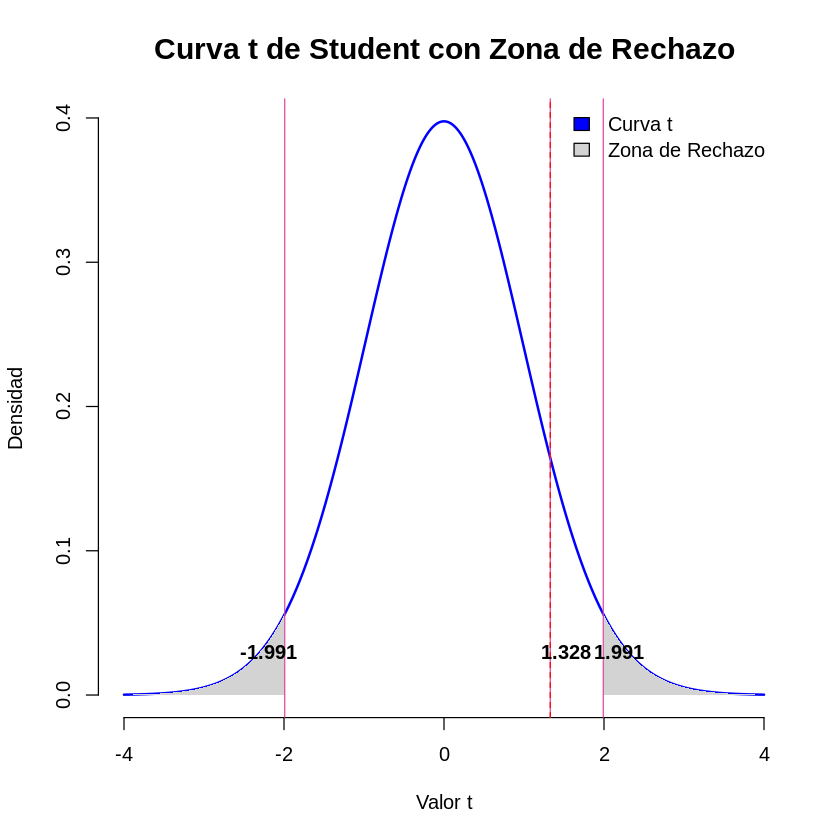

In [14]:
n_grados = 78
nivel_significancia = 0.05
# Valores críticos
valor_critico_superior = qt(1 - nivel_significancia / 2, df = n_grados)
valor_critico_inferior = -valor_critico_superior
# Generamos y dibujamos una curva t
x = seq(-4, 4, length.out = 1000)
y = dt(x, df = n_grados) 
plot(x, y, type = "l", lwd = 2, col = "blue", xlab = "Valor t", ylab = "Densidad", bty = "n")
# Pintamos el área bajo la curva
x_area_inferior = x[(x >= min(x)) & (x < valor_critico_inferior)]
y_area_inferior = dt(x_area_inferior, df = n_grados)
x_area_superior = x[(x > valor_critico_superior) & (x <= max(x))]
y_area_superior = dt(x_area_superior, df = n_grados)
polygon(c(x_area_inferior,valor_critico_inferior,min(x)),c(y_area_inferior, 0, 0),col = "lightgray", border = NA)
polygon(c(valor_critico_superior,x_area_superior,max(x_area_superior)),c(0, y_area_superior, 0),col = "lightgray", border = NA)
# Valores críticos
abline(v = c(valor_critico_inferior, valor_critico_superior,tt$statistic), col = "#d94c9f", lty = 1)
abline(v = c(tt$statistic), col = "red", lty = 2)
# Añadimos valores críticos
text(valor_critico_inferior - 0.2, 0.03, round(valor_critico_inferior, 3), col = "black", font = 2)
text(valor_critico_superior + 0.2, 0.03, round(valor_critico_superior, 3), col = "black", font = 2)
text(tt$statistic + 0.2, 0.03, round(tt$statistic, 3), col = "black", font = 2)
# Título y leyenda
title("Curva t de Student con Zona de Rechazo", cex.main = 1.5)
legend("topright", legend = c("Curva t", "Zona de Rechazo"), fill = c("blue", "lightgray"), cex = 1, bty = "n")

In [15]:
print("T TEST DE UNA MUESTRA INDEPENDIENTE DE DOS COLAS PARA LA MEDIA ACTUAL")
t.test(Current, 
       paired = F, 
       conf.level = 0.95, 
       alternative = "t")

[1] "T TEST DE UNA MUESTRA INDEPENDIENTE DE DOS COLAS PARA LA MEDIA ACTUAL"



	One Sample t-test

data:  Current
t = 195.29, df = 39, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 267.4757 273.0743
sample estimates:
mean of x 
  270.275 


+ El intervalo de confianza del 95% para la media de la distancia de conducción de Current es [267.4757   TO   273.0743]

In [16]:
print("T TEST DE UNA MUESTRA INDEPENDIENTE DE DOS COLAS PARA UNA NUEVA MEDIA")
t.test(New, 
       paired = F, 
       conf.level = 0.95, 
       alternative = "t")

[1] "T TEST DE UNA MUESTRA INDEPENDIENTE DE DOS COLAS PARA UNA NUEVA MEDIA"



	One Sample t-test

data:  New
t = 170.94, df = 39, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 264.3348 270.6652
sample estimates:
mean of x 
    267.5 


El intervalo de confianza del 95% para la media de la distancia de conducción de New es [264.3348 TO 270.6652]

**PUNTO DE SITUACIÓN TEST HIPÓTESIS**

- Si comparamos las medias de las dos distribuciones de muestra, vemos que aunque visualmente parece que el New recubrimiento tiene efecto sobre las distancias de conducción, estadísticamente no es así.
- La diferencia de media en el caso de bolas New también se puede atribuir a la mayor variación en comparación con las bolas actuales.
- La variación de las distancias de conducción de bolas nuevas es 97,95 es un 28% más que la variación de las distancias de conducción de las bolas actuales 76,61.
- No estamos seguros del error de muestreo presente en los datos.
- Estadísticamente, no hay ningún efecto del nuevo recubrimiento en las distancias de conducción. Aunque se sugiere verificar el efecto sobre los pesos y otras características como el tamaño y la forma de las nuevas bolas.
- La muestra dada es de un solo campo de golf. Es aconsejable que la prueba se realice en diferentes tipos de campos de golf para solucionar las diferencias en los terrenos.

## <font color='#3d59c6'> CONSIDERACIONES ERRORES DE TIPO I Y TIPO II </font>

**Error de tipo I α:** probabilidad de rechazar una hipótesis nula cuando es verdadera, la probabilidad de un error de tipo I en la prueba de hipótesis está predeterminada por el nivel de significancia.


**Error tipo II β:** Probabilidad de no rechazar la hipótesis nula cuando es falsa. El cálculo del error de tipo II depende de la media poblacional que se desconoce.

#### Tamaño de la muestra para igualar las probabilidades de error tipo I y tipo II

Supongamos que necesitamos un error de tipo I y un error de tipo II igual a 0.05

Suponiendo que la desviación estándar de la muestra es igual a la desviación estándar de la población, podemos calcular el tamaño de muestra necesario de la siguiente manera:

1. La diferencia media de la hipótesis nula µ0 es 0.

2. La diferencia media de la hipótesis alternativa µ1 es 5.

3. La desviación estándar de la muestra es 13,74397.

4. El valor α es 0.05

5. El valor β es 0.05, es decir, la potencia de la prueba es 0.95 = 95%

In [17]:
## NÚMERO DE OBSERVACIONES REQUERIDAS PARa ALPHA = BETA y DELTA = 5 YARD ##
power.t.test(power = .95, delta = 5, sd = sd(Current - New), 
             type = "t", 
             alternative = "t", 
             sig.level = .05)


     Two-sample t test power calculation 

              n = 197.3383
          delta = 5
             sd = 13.74397
      sig.level = 0.05
          power = 0.95
    alternative = two.sided

NOTE: n is number in *each* group


Por lo tanto, para retener la potencia, necesitamos redondear el valor al siguiente número entero: podemos concluir que **necesitamos un tamaño de muestra de 198 para igualar los errores Tipo I y Tipo II**.

## <font color='#3d59c6'> CONCLUSIONES </font>

A partir de los datos proporcionados, se puede concluir que, estadísticamente, **no hay un cambio significativo en la distancia de conducción debido al nuevo revestimiento de las pelotas de golf.**

Sin embargo, nuestra recomendación es que la prueba se lleve a cabo con un tamaño de muestra mayor que cubra un número de campos de golf (al menos cinco diferentes) para mejorar la precisión de los resultados de la prueba y anular cualquier efecto de un tipo de terreno.

Además, los resultados deben interpretarse y planificarse acciones futuras con la comprensión de otras características como tamaño, forma, peso, etc.